<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>Traitement du signal (S6)</h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">TP1</span> <span class="badge badge-info"> 2021</span></p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
<h1>Eléments de Traitement des Signaux Numériques</h1>
    <h2>TP1 : Prise en main des librairies - Signaux numériques</h2>
</div>

## Introduction
Le traitement numérique du signal désigne l’ensemble des opérations, calculs arithmétiques et manipulations de nombres, qui sont effectués sur un signal à traiter. Le signal étant représenté par une suite ou un ensemble de nombres, le traitement numérique a pour but de fournir une autre suite ou un autre ensemble de nombres, qui représentent le signal après traitement. Les traitements les plus variés sont réalisables de cette manière, comme l’analyse spectrale, le filtrage, le transcodage, la modulation, l'estimation et la détection.

L’objectif du travail que nous traitons ce semestre est de posséder les outils de base nécessaires pour l’analyse et le traitement des signaux numériques. Ce travail est formé de cinq TPs. 

* Le TP 1 est une initiation à l'outil numérique utilisé dans notre étude : Python et les librairies utilisées pour le traitement du signal.
* Le TP 2 traite de l’échantillonnage, la quantification et le codage d’un signal.
* Le TP 3 est consacré à la transformation de Fourier discrète.
* Le TP 4 traite de la convolution numérique et de la notion de fonction de transfert d’un système discret. Ce TP présente aussi les propriétés des filtres à réponse impulsionnelle finie (RIF) ainsi que les filtres à réponse impulsionnelle infinie (RII).

## But de l'étude

Dans ce premier TP, nous allons apprendre à nous familiariser avec le langage Python et les librairies `numpy`(gestion des matrices), `scipy` (traitement des signaux) et `matplotlib` (affichage). Plus spécifiquement, nous allons voir comment générer un signal et comment le représenter.

In [23]:
import numpy as np
from scipy.signal import *
from matplotlib.pyplot import *
from IPython.display import Audio #pour écouter les sons

<div class='alert alert-info'>Les documentations sont disponibles aux adresses suivantes :
    <ul>
        <li><a href="https://numpy.org/doc/1.19/">Numpy</a></li>
        <li><a href="https://docs.scipy.org/doc/scipy/reference/">Scipy</a></li>
        <li><a href="https://matplotlib.org">Matplotlib</a></li>
    </ul>
</div>

## Génération de séquences exponentielles

L'objectif de cet exercice est de numériser la réponse impulsionnelle d'un système du premier ordre :

$$h(t)=\frac{K}{\tau}e^{-\frac{t}{\tau}}u(t)$$

où $K$ désigne le gain statique, $\tau$ la constante de temps et $u(t)$ l'échelon unité.

La réponse impulsionnelle sera échantillonnée à la période d'échantillonnage $T_e=10$ms.

### Génération de la base temporelle

Pour synthétiser un signal numérique, il est tout d'abord nécessaire de générer la base temporelle. La base temporelle s'exprime sous la forme :

$$t=nT_e$$

où $T_e$ correspond à la période d'échantillonnage ($T_e=1/f_e$) et $n$ est un entier relatif ($n\in \mathbb{Z}$).

**Question** En utilisant la fonction `arange` de Numpy (voir <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html">documentation</a>), créer un vecteur temps allant de $0$ à $0.5$s (exclu) avec une période d'échantillonnage $T_e=10$ms.

In [24]:
Te = 0.01

t = np.arange(0, 0.5, Te)

### Numérisation du signal 

Pour synthétiser le signal numérique, nous allons évaluer $h(t)$ pour chaque valeur de $t$ comprise dans le vecteur temps `t` précédemment généré. 

**Question** En utilisant la fonction `exp` de Numpy (voir <a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html">documentation</a>), évaluer pour $t=nT_e$ la fonction $h(t)=\frac{K}{\tau}e^{-\frac{t}{\tau}}$ avec les paramètres $K=1$ et $\tau=0.2$s.

In [25]:
K = 1
tau = 0.2

def _h(K, tau, t):
    return K/tau*np.exp(-t/tau)

h = _h(K, tau, t)


### Affichage du signal 

Sous Python, l'affichage d'un signal numérique peut s'obtenir facilement via la librairie matplotlib. Spécifiquement, nous pouvons utiliser :

* soit la fonction `plot` avec un marqueur circulaire  (voir <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html">documentation</a>),
* soit la fonction `stem` (voir <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html">documentation</a>).

**Question** Afficher le signal $h$ pour $t=nT_e$ en utilisant la fonction `plot`avec marqueur circulaire (`o`) ou avec la fonction `stem`. Faire la représentation en fonction de $n$, puis en fonction de $nT_e$ (en s). Veiller à bien annoter l'axe des abscisses et des ordonnées avec les fonctions `xlabel` et `ylabel`

Text(0.5, 1.0, 'h(nTe)')

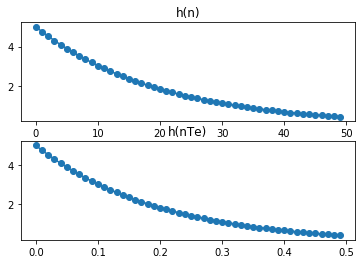

In [26]:
n = np.arange(0, 50, 1)

fig, ax = subplots(2)

ax[0].plot(n, h, marker = "o")
ax[1].plot(t, h, marker = "o")

ax[0].set_title('h(n)')
ax[1].set_title('h(nTe)')

## Séquences sinusoïdales

Dans cet exercice, nous allons numériser puis représenter un signal $x(t)$ composé de l'addition de deux sinusoïdes de fréquences et amplitudes respectives $f_1=200$ Hz, $a_1=1$ et $f_2=1200$ Hz, $a_2=0.2$. 

**Question** Créer une variable `x` obtenue en numérisant le signal $x(t)$ à la fréquence d'échantillonnage $\nu_e=44.1$kHz avec une base temps allant de $0$ à $0.5$s.

In [27]:
ve = 44100

t = np.arange(0, 0.5, 1/ve)

x = 1*np.sin(2*np.pi*200*t) + 0.2*np.sin(2*np.pi*1200*t)

**Question** Représenter le signal `x` en fonction du temps pour $t$ allant de $0$ à $0.002$s (en annotant les abscisses et les ordonnées). 

Text(0, 0.5, 'x')

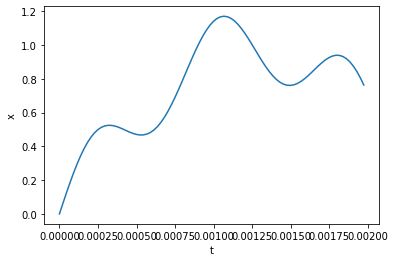

In [28]:
plot(t[:int(0.002*ve)], x[:int(0.002*ve)])
xlabel("t")
ylabel("x")

**Question** En utilisant la fonction `Audio` d'Ipython (voir <a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html">documentation</a>), écouter le signal `x`.


In [29]:
framerate = 44100

Audio(x, rate=framerate)

## Séquences élémentaires : impulsion, échelon, rampe, etc

L'objectif de cet exercice est de générer et d'afficher plusieurs signaux numériques élémentaires.

In [30]:
Te = 0.01
t = np.arange(0,0.5,Te)

### Impulsion unité

Le signal impulsion unité est défini par :

$$\delta[n]=\left\{\begin{array}{cl}1 & \text{ si }n=0\\
0 & \text{ailleurs}
\end{array}\right.$$

**Question** Le signal $\delta[n]$ est généré par les commandes suivantes. Représenter le avec la fonction `stem`.

<StemContainer object of 3 artists>

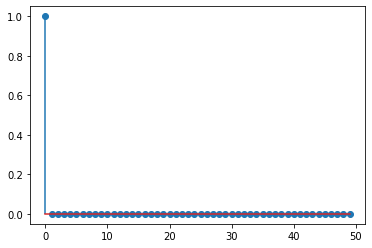

In [31]:
delta = 0*t
delta[0] = 1
stem(delta, use_line_collection=True)

### Echelon 

Le signal échelon est défini par :

$$u[n]=\left\{\begin{array}{cl}1 & \text{ si }n\ge 0\\
0 & \text{ailleurs}
\end{array}\right.$$

**Question** Générer puis représenter le signal $u[n]$.

<StemContainer object of 3 artists>

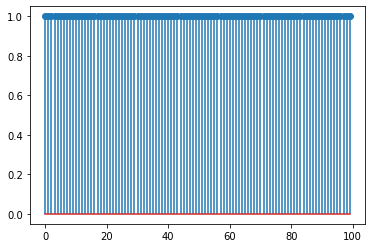

In [38]:
unite = t/t
stem(unite, use_line_collection=True)

### Rampe

Le signal rampe continu est défini par $r(t)=t u(t)$. 

**Question** Générer puis représenter le signal $r[n]$ obtenu à partir de la numérisation du signal $r(t)$.

<StemContainer object of 3 artists>

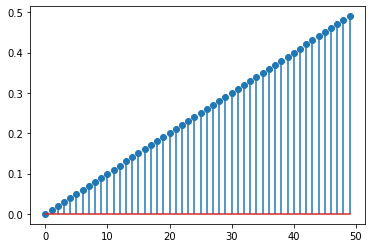

In [33]:
rampe = 1*t
stem(rampe, use_line_collection=True)

# remplissage = np.ones(t)

# if (t<0) :
#     remplissage[t]=0

### Parabole

Le signal parabole continu est défini par $p(t)=t^2$. 

**Question** Générer puis représenter le signal $p[n]$ obtenu à partir de la numérisation du signal $p(t)$.

<StemContainer object of 3 artists>

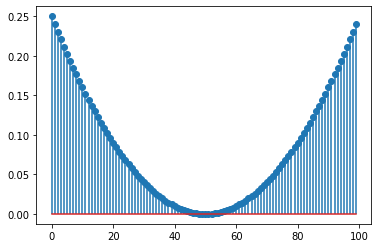

In [36]:
t = np.arange(-0.5,0.5,Te)
para = t*t
stem(para, use_line_collection=True)

### Carré

**Question** Générer puis représenter le signal $s[n]$ obtenu à partir de la numérisation d'un signal carré de fréquence $5$Hz. Pour générer le signal carré, vous pouvez utiliser la fonction `square` de Scipy (voir <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html">documentation</a>).

<StemContainer object of 3 artists>

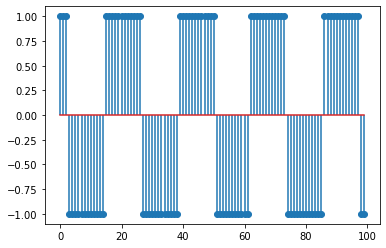

In [46]:
carre =  square(5000*t)
# plot(t,carre)
stem(carre, use_line_collection=True)